# Image Classification (CATS vs DOGS)

In [ ]:
import tensorflow as tf

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
batch_size = 64
input_size=(128,128)
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/dataset/training_set',
                                                 target_size = input_size,
                                                 batch_size = batch_size,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('/content/dataset/test_set',
                                            target_size = input_size,
                                            batch_size = batch_size,
                                            class_mode = 'binary',
                                            shuffle=False)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


MODEL 1 :

In [ ]:
from keras import layers

model1 = tf.keras.models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128,128,3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.1),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid')
])

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

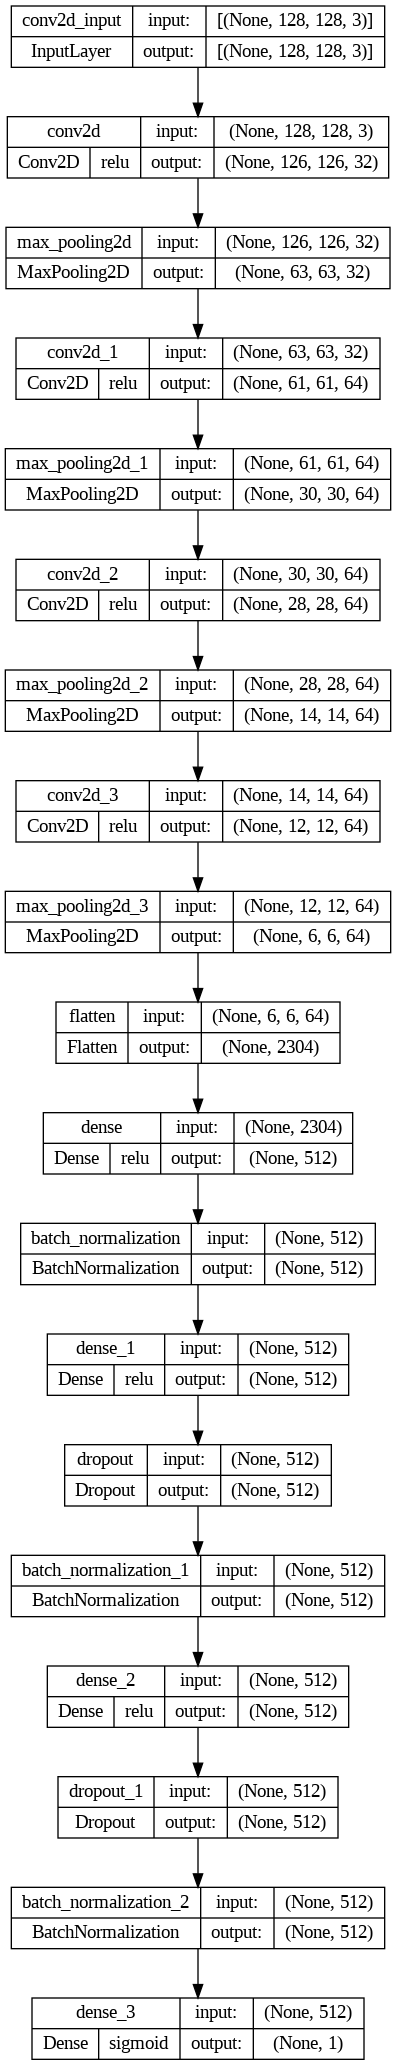

In [ ]:
tf.keras.utils.plot_model(model1, show_shapes=True,show_layer_activations=True,to_file='model1.png')

In [ ]:
model1.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
model1.fit(training_set,
          steps_per_epoch = 8000/batch_size,
          epochs = 10,
          validation_data = test_set,
          validation_steps = 2000/batch_size)

Epoch 1/10
125/125 [==============================] - 348s 3s/step - loss: 0.7694 - accuracy: 0.5816 - val_loss: 0.7324 - val_accuracy: 0.5050
Epoch 2/10
125/125 [==============================] - 309s 2s/step - loss: 0.6710 - accuracy: 0.6256 - val_loss: 0.7908 - val_accuracy: 0.5140
Epoch 3/10
125/125 [==============================] - 299s 2s/step - loss: 0.6121 - accuracy: 0.6680 - val_loss: 0.6560 - val_accuracy: 0.6205
Epoch 4/10
125/125 [==============================] - 296s 2s/step - loss: 0.5547 - accuracy: 0.7200 - val_loss: 0.8170 - val_accuracy: 0.5690
Epoch 5/10
125/125 [==============================] - 299s 2s/step - loss: 0.5027 - accuracy: 0.7576 - val_loss: 0.9284 - val_accuracy: 0.5365
Epoch 6/10
125/125 [==============================] - 297s 2s/step - loss: 0.4755 - accuracy: 0.7745 - val_loss: 0.5854 - val_accuracy: 0.7285
Epoch 7/10
125/125 [==============================] - 298s 2s/step - loss: 0.4501 - accuracy: 0.7846 - val_loss: 0.4900 - val_accuracy: 0.7650

In [ ]:
model1.save('model1.keras')

MODEL 2:

In [ ]:
model2 = tf.keras.models.Sequential()
input_size = (128, 128)
model2.add(tf.keras.layers.Convolution2D(32, 3, 3, input_shape = (*input_size, 3), activation = 'relu'))
model2.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))
model2.add(tf.keras.layers.Convolution2D(32, 3, 3, activation = 'relu'))
model2.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(units = 64, activation = 'relu'))
model2.add(tf.keras.layers.Dropout(0.5))
model2.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))
model2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 42, 42, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 21, 21, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 32)          9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 3, 3, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 288)               0         
                                                                 
 dense_4 (Dense)             (None, 64)               

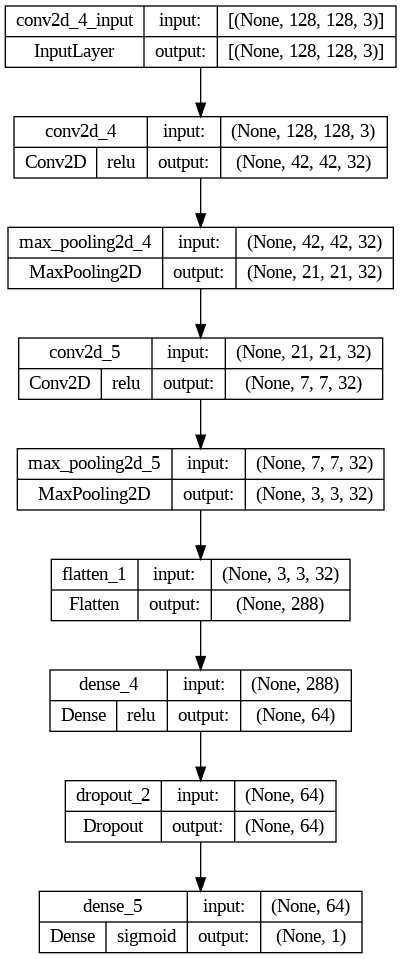

In [ ]:
tf.keras.utils.plot_model(model2, show_shapes=True,show_layer_activations=True,to_file='model2.png')

In [ ]:
model2.fit(training_set,
          steps_per_epoch = 8000/batch_size,
          epochs = 10,
          validation_data = test_set,
          validation_steps = 2000/batch_size)

Epoch 1/10
125/125 [==============================] - 71s 558ms/step - loss: 0.6896 - accuracy: 0.5321 - val_loss: 0.6719 - val_accuracy: 0.6375
Epoch 2/10
125/125 [==============================] - 68s 544ms/step - loss: 0.6716 - accuracy: 0.5919 - val_loss: 0.6515 - val_accuracy: 0.6385
Epoch 3/10
125/125 [==============================] - 65s 521ms/step - loss: 0.6340 - accuracy: 0.6450 - val_loss: 0.6054 - val_accuracy: 0.6725
Epoch 4/10
125/125 [==============================] - 65s 523ms/step - loss: 0.6087 - accuracy: 0.6720 - val_loss: 0.5918 - val_accuracy: 0.6940
Epoch 5/10
125/125 [==============================] - 65s 519ms/step - loss: 0.5889 - accuracy: 0.6891 - val_loss: 0.5685 - val_accuracy: 0.6985
Epoch 6/10
125/125 [==============================] - 64s 510ms/step - loss: 0.5722 - accuracy: 0.6974 - val_loss: 0.5462 - val_accuracy: 0.7170
Epoch 7/10
125/125 [==============================] - 65s 520ms/step - loss: 0.5622 - accuracy: 0.7092 - val_loss: 0.5533 - val_ac

In [ ]:
model2.save('model2.keras')

MODEL 3:

In [ ]:

model3 = tf.keras.models.Sequential()

model3.add(tf.keras.layers.Convolution2D(64, 3, 3, input_shape=(*input_size, 3), activation='relu'))
model3.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model3.add(tf.keras.layers.Convolution2D(64, 3, 3, activation='relu'))
model3.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))


model3.add(tf.keras.layers.Flatten())

model3.add(tf.keras.layers.Dense(units=128, activation='relu'))
model3.add(tf.keras.layers.Dropout(0.5))

model3.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 42, 42, 64)        1792      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 21, 21, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 3, 3, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 576)               0         
                                                                 
 dense_6 (Dense)             (None, 128)              

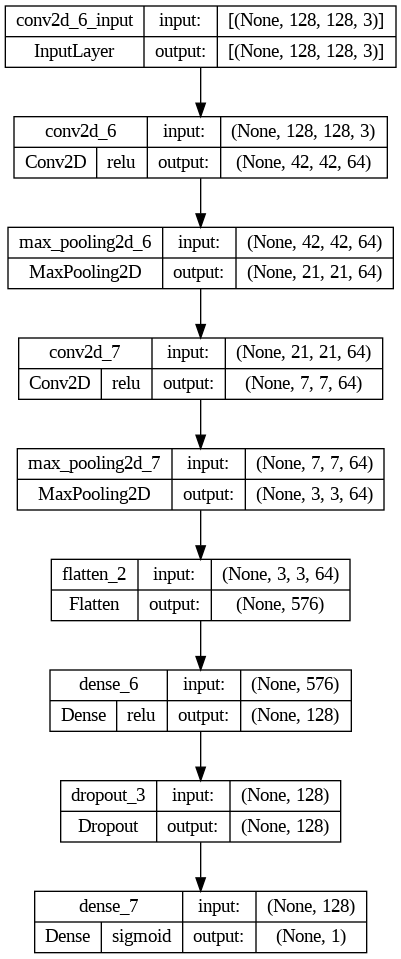

In [ ]:
tf.keras.utils.plot_model(model3, show_shapes=True,show_layer_activations=True,to_file='model3.png')

In [ ]:
model3.fit(training_set,
          steps_per_epoch = 8000/batch_size,
          epochs = 10,
          validation_data = test_set,
          validation_steps = 2000/batch_size)

Epoch 1/10
125/125 [==============================] - 79s 627ms/step - loss: 0.6918 - accuracy: 0.5225 - val_loss: 0.6861 - val_accuracy: 0.6085
Epoch 2/10
125/125 [==============================] - 77s 615ms/step - loss: 0.6704 - accuracy: 0.5871 - val_loss: 0.6326 - val_accuracy: 0.6460
Epoch 3/10
125/125 [==============================] - 77s 619ms/step - loss: 0.6404 - accuracy: 0.6314 - val_loss: 0.6099 - val_accuracy: 0.6635
Epoch 4/10
125/125 [==============================] - 71s 568ms/step - loss: 0.6144 - accuracy: 0.6679 - val_loss: 0.6051 - val_accuracy: 0.6760
Epoch 5/10
125/125 [==============================] - 73s 586ms/step - loss: 0.5925 - accuracy: 0.6796 - val_loss: 0.5852 - val_accuracy: 0.7055
Epoch 6/10
125/125 [==============================] - 76s 608ms/step - loss: 0.5679 - accuracy: 0.7066 - val_loss: 0.5453 - val_accuracy: 0.7290
Epoch 7/10
125/125 [==============================] - 73s 578ms/step - loss: 0.5541 - accuracy: 0.7159 - val_loss: 0.5462 - val_ac

In [ ]:
model3.save('model3.keras')

MODEL 4:

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)


model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

print(model.summary())


58889256/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                              

In [ ]:
model.fit(training_set,
          steps_per_epoch = 8000/batch_size,
          epochs = 5,
          validation_data = test_set,
          validation_steps = 2000/batch_size)

Epoch 1/5
125/125 [==============================] - 2126s 17s/step - loss: 0.4167 - accuracy: 0.8086 - val_loss: 0.3179 - val_accuracy: 0.8675
Epoch 2/5
125/125 [==============================] - 2102s 17s/step - loss: 0.3317 - accuracy: 0.8551 - val_loss: 0.2887 - val_accuracy: 0.8855
Epoch 3/5
125/125 [==============================] - 2092s 17s/step - loss: 0.3111 - accuracy: 0.8591 - val_loss: 0.2831 - val_accuracy: 0.8860
Epoch 4/5
125/125 [==============================] - 2092s 17s/step - loss: 0.3009 - accuracy: 0.8649 - val_loss: 0.2783 - val_accuracy: 0.8890
Epoch 5/5
125/125 [==============================] - 2137s 17s/step - loss: 0.2986 - accuracy: 0.8684 - val_loss: 0.2751 - val_accuracy: 0.8845


In [ ]:
model.save('model4.keras')

CONFUSION MATRIX

In [ ]:
model1 = tf.keras.models.load_model('model1.keras')
model2 = tf.keras.models.load_model('model2.keras')
model3 = tf.keras.models.load_model('model3.keras')
model4 = tf.keras.models.load_model('model4.keras')

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

predictions1 = model1.predict(test_set, steps=len(test_set), verbose=1)
predicted_classes1 = (predictions1 > 0.5).astype(int)

predictions2 = model2.predict(test_set, steps=len(test_set), verbose=1)
predicted_classes2 = (predictions2 > 0.5).astype(int)

predictions3 = model3.predict(test_set, steps=len(test_set), verbose=1)
predicted_classes3 = (predictions3 > 0.5).astype(int)

predictions4 = model4.predict(test_set, steps=len(test_set), verbose=1)
predicted_classes4 = (predictions4 > 0.5).astype(int)

true_labels = test_set.classes

# Confusion Matrix
conf_matrix1 = confusion_matrix(true_labels, predicted_classes1)
conf_matrix2 = confusion_matrix(true_labels, predicted_classes2)
conf_matrix3 = confusion_matrix(true_labels, predicted_classes3)
conf_matrix4 = confusion_matrix(true_labels, predicted_classes4)


print("Confusion Matrix for Model 1:")
print(conf_matrix1)
print("===================================")
print("Confusion Matrix for Model 2:")
print(conf_matrix2)
print("===================================")
print("Confusion Matrix for Model 3:")
print(conf_matrix3)
print("===================================")
print("Confusion Matrix for Model 4:")
print(conf_matrix4)

32/32 [==============================] - 410s 13s/step
Confusion Matrix for Model 1:
[[767 233]
 [144 856]]
Confusion Matrix for Model 2:
[[760 240]
 [283 717]]
Confusion Matrix for Model 3:
[[704 296]
 [196 804]]
Confusion Matrix for Model 4:
[[889 111]
 [120 880]]


In [ ]:
from prettytable import PrettyTable


model1_conf_matrix = conf_matrix1
model2_conf_matrix = conf_matrix2
model3_conf_matrix = conf_matrix3
model4_conf_matrix = conf_matrix4


def calculate_metrics(conf_matrix):
    tp, fp, fn, tn = conf_matrix[0][0], conf_matrix[0][1], conf_matrix[1][0], conf_matrix[1][1]
    accuracy = (tp + tn) / sum(sum(conf_matrix))
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * (precision * recall) / (precision + recall)
    selectivity = tn / (tn + fp)
    negative_predictive_value = tn / (tn + fn)
    miss_rate = fn / (fn + tp)
    fall_out = fp / (fp + tn)
    false_discovery_rate = fp / (fp + tp)
    false_omission_rate = fn / (fn + tn)
    positive_likelihood_ratio = recall / fall_out
    negative_likelihood_ratio = miss_rate / selectivity
    balance_accuracy = (recall + selectivity) / 2
    threat_score = tp / (tp + fp + fn)
    return accuracy, precision, recall, f1_score, selectivity, negative_predictive_value, miss_rate, fall_out, false_discovery_rate, false_omission_rate, positive_likelihood_ratio, negative_likelihood_ratio, balance_accuracy, threat_score


table = PrettyTable()
table.field_names = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "Selectivity", "Negative Predictive Value", "Miss Rate", "Fall Out", "False Discovery Rate", "False Omission Rate", "Positive Likelihood Ratio", "Negative Likelihood Ratio", "Balance Accuracy", "Threat Score"]

for model_name, conf_matrix in zip(["Model 1", "Model 2", "Model 3","Model 4"], [model1_conf_matrix, model2_conf_matrix, model3_conf_matrix,model4_conf_matrix]):
    accuracy, precision, recall, f1_score, selectivity, negative_predictive_value, miss_rate, fall_out, false_discovery_rate, false_omission_rate, positive_likelihood_ratio, negative_likelihood_ratio, balance_accuracy, threat_score = calculate_metrics(conf_matrix)
    table.add_row([model_name, f"{accuracy:.2f}", f"{precision:.2f}", f"{recall:.2f}", f"{f1_score:.2f}", f"{selectivity:.2f}", f"{negative_predictive_value:.2f}", f"{miss_rate:.2f}", f"{fall_out:.2f}", f"{false_discovery_rate:.2f}", f"{false_omission_rate:.2f}", f"{positive_likelihood_ratio:.2f}", f"{negative_likelihood_ratio:.2f}", f"{balance_accuracy:.2f}", f"{threat_score:.2f}"])

print(table)


+---------+----------+-----------+--------+----------+-------------+---------------------------+-----------+----------+----------------------+---------------------+---------------------------+---------------------------+------------------+--------------+
|  Model  | Accuracy | Precision | Recall | F1 Score | Selectivity | Negative Predictive Value | Miss Rate | Fall Out | False Discovery Rate | False Omission Rate | Positive Likelihood Ratio | Negative Likelihood Ratio | Balance Accuracy | Threat Score |
+---------+----------+-----------+--------+----------+-------------+---------------------------+-----------+----------+----------------------+---------------------+---------------------------+---------------------------+------------------+--------------+
| Model 1 |   0.81   |    0.77   |  0.84  |   0.80   |     0.79    |            0.86           |    0.16   |   0.21   |         0.23         |         0.14        |            3.94           |            0.20           |       0.81    